In [3]:
import shap

shap.initjs()
import matplotlib.pylab as pl
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 读取CSV文件
data = pd.read_csv('ICE_new.csv').iloc[:, 1:]

# 假设最后一列是目标变量
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]   # 目标变量

# 划分训练集和测试集
y = data['ICE']
X = data.drop('ICE', axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = xgb.XGBRegressor(objective="reg:squarederror",max_depth=3) 
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

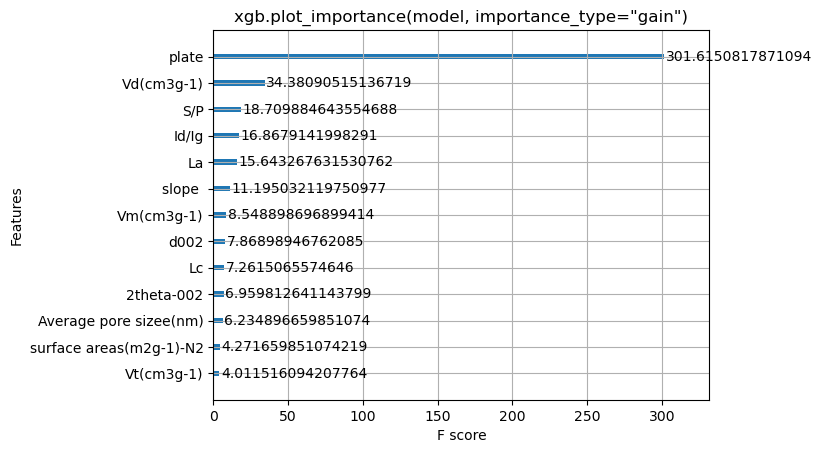

In [15]:
xgb.plot_importance(model, importance_type="gain")
pl.title('xgb.plot_importance(model, importance_type="gain")')
pl.show()

In [16]:
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)
# Get shape of interaction values
print(np.shape(shap_interaction))

# SHAP interaction values for first employee
pd.DataFrame(shap_interaction[0],index=X.columns,columns=X.columns)

(50, 14, 14)


[20:23:43] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


,2theta-002,d002,Lc,Id/Ig,La,Vt(cm3g-1),Vm(cm3g-1),Vd(cm3g-1),surface areas(m2g-1)-N2,Average pore sizee(nm),slope,plate,S/P,lg(s/p)
2theta-002,0.785578,-0.000646,-0.001301,0.000668,0.000000,-0.032484,0.000000,0.000000,-0.071550,-0.004051,-0.272792,-0.068493,0.151696,0.0
d002,-0.000646,-0.260255,-0.008815,0.004037,0.001463,0.000000,0.000000,0.000000,-0.035096,0.003016,0.028133,0.137218,-0.006399,0.0
Lc,-0.001301,-0.008815,0.573787,0.032533,0.000000,0.046795,-0.002409,0.000000,0.079039,0.001168,0.068307,-0.388537,-0.079564,0.0
Id/Ig,0.000668,0.004037,0.032533,-0.810027,-0.071113,-0.000050,-0.001520,0.000000,-0.000842,0.216309,0.007702,-0.156733,0.103645,0.0
La,0.000000,0.001463,0.000000,-0.071113,0.408310,-0.016753,0.000000,0.000000,0.000000,-0.000214,0.000000,-0.126967,-0.036395,0.0
Vt(cm3g-1),-0.032484,0.000000,0.046795,-0.000050,-0.016753,0.172992,0.000000,0.012240,0.000000,0.000091,0.000261,0.000000,0.477329,0.0
Vm(cm3g-1),0.000000,0.000000,-0.002409,-0.001520,0.000000,0.000000,0.034689,0.000000,0.000000,-0.003609,0.000000,0.118131,0.084004,0.0
Vd(cm3g-1),0.000000,0.000000,0.000000,0.000000,0.000000,0.012240,0.000000,-0.174535,0.000000,0.000000,0.000000,0.087689,0.026591,0.0
surface areas(m2g-1)-N2,-0.071550,-0.035096,0.079039,-0.000842,0.000000,0.000000,0.000000,0.000000,-0.920589,-0.151530,-0.118159,0.348855,0.085456,0.0
Average pore sizee(nm),-0.004051,0.003016,0.001168,0.216309,-0.000214,0.000091,-0.003609,0.000000,-0.151530,0.736183,0.133834,-0.178578,-0.114136,0.0


In [17]:
y_pred = model.predict(X)

# Calculate mean prediction 
mean_pred = np.mean(y_pred)

# Sum of interaction values for first employee
sum_shap = np.sum(shap_interaction[0])

# Values below should be the same
print("Model prediction: {}".format(y_pred[0]))
print("Mean prediction + interaction values: {}".format(mean_pred+sum_shap))

Model prediction: 39.996498107910156
Mean prediction + interaction values: 39.99650573730469


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, '2theta-002'),
  Text(0, 1.5, 'd002'),
  Text(0, 2.5, 'Lc'),
  Text(0, 3.5, 'Id/Ig'),
  Text(0, 4.5, 'La'),
  Text(0, 5.5, 'Vt(cm3g-1)'),
  Text(0, 6.5, 'Vm(cm3g-1)'),
  Text(0, 7.5, 'Vd(cm3g-1)'),
  Text(0, 8.5, 'surface areas(m2g-1)-N2'),
  Text(0, 9.5, 'Average pore sizee(nm)'),
  Text(0, 10.5, 'slope '),
  Text(0, 11.5, 'plate'),
  Text(0, 12.5, 'S/P'),
  Text(0, 13.5, 'lg(s/p)')])

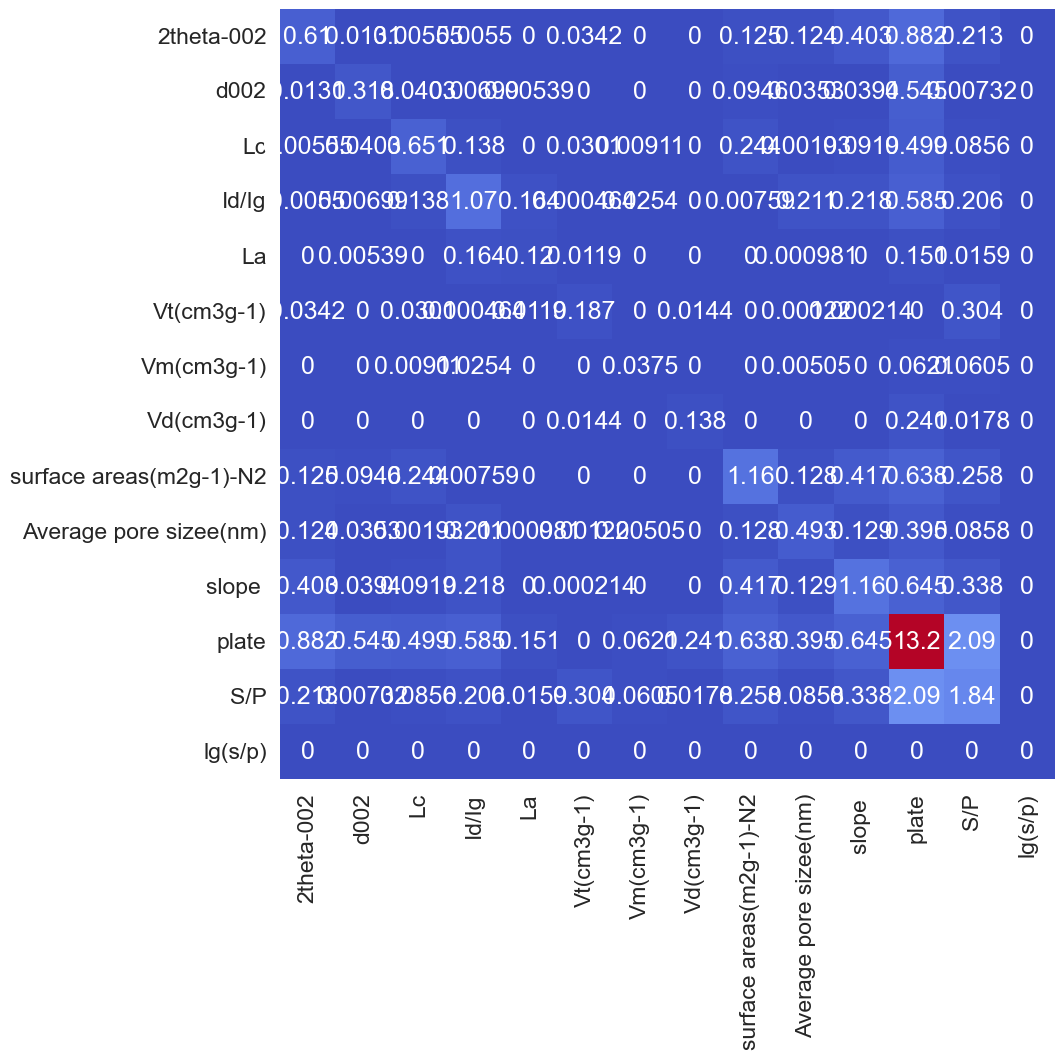

In [18]:
mean_shap = np.abs(shap_interaction).mean(0)
df = pd.DataFrame(mean_shap,index=X.columns,columns=X.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df),df.values*2,inplace=True)

# display 
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.yticks(rotation=0) 

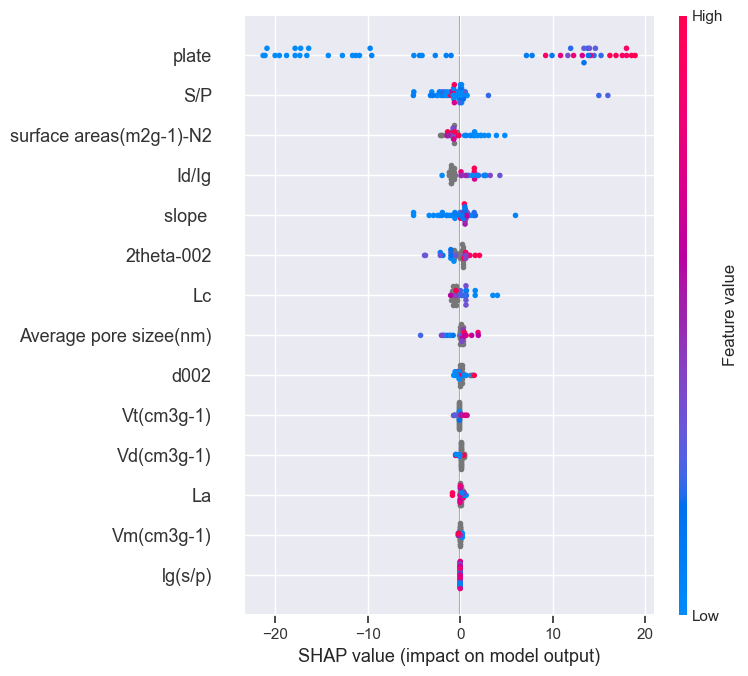

In [20]:
shap_values = explainer(X)
shap.summary_plot(shap_values, X)